<a href="https://colab.research.google.com/github/maryamt95/project-files/blob/main/sea_ice_segment_1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive 

In [1]:
from google.colab import drive  
drive._mount('/content/drive') 

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt # date and time processing functions
import itertools
import matplotlib.pyplot as plt # basic plotting 
from matplotlib.offsetbox import AnchoredText
plt.style.use('ggplot') # use ggplot style
%matplotlib inline 

#Reading North sea ice extent 

In [122]:
# read in the data from the provided csv file
north = pd.read_csv('/content/drive/MyDrive/data/N_seaice_extent_daily_v3.0.csv')

# drop the 'Source Data' column as it obscures more useful columns and doesn't tell us much
north.drop(' Source Data', axis = 1, inplace = True)
north.drop('hemisphere',axis=1,inplace=True)
north.head()



,Year,Month,Day,Extent,Missing
0,YYYY,MM,DD,10^6 sq km,10^6 sq km
1,1978,10,26,10.231,0
2,1978,10,28,10.42,0
3,1978,10,30,10.557,0
4,1978,11,1,10.67,0


In [123]:
#drop first row and reset index 
north = north.iloc[1: , :]
north.reset_index(drop=True, inplace=True)

In [124]:
north.head()

,Year,Month,Day,Extent,Missing
0,1978,10,26,10.231,0
1,1978,10,28,10.42,0
2,1978,10,30,10.557,0
3,1978,11,1,10.67,0
4,1978,11,3,10.777,0


In [125]:
#remove spacing from column names 
north=north.rename(columns={'Year':'Year',' Month':'Month',' Day':'Day','     Extent':'Extent','    Missing':'Missing'})

In [126]:
# convert the provided 3 column date format to datetime format and set it as the index
north['Date'] = pd.to_datetime(north[['Year','Month','Day']])
seaice_extent_north=north


In [127]:
seaice_extent_north.head()

,Year,Month,Day,Extent,Missing,Date
0,1978,10,26,10.231,0,1978-10-26
1,1978,10,28,10.42,0,1978-10-28
2,1978,10,30,10.557,0,1978-10-30
3,1978,11,1,10.67,0,1978-11-01
4,1978,11,3,10.777,0,1978-11-03


In [128]:
north.index = north['Date'].values
north.head()

,Year,Month,Day,Extent,Missing,Date
1978-10-26,1978,10,26,10.231,0,1978-10-26
1978-10-28,1978,10,28,10.42,0,1978-10-28
1978-10-30,1978,10,30,10.557,0,1978-10-30
1978-11-01,1978,11,1,10.67,0,1978-11-01
1978-11-03,1978,11,3,10.777,0,1978-11-03


In [84]:

#change datatatypes 
north=north.astype({'Year':np.int64,'Month':np.int64,'Day':np.int64,'Extent':np.float64,'Missing':np.float64})

In [85]:
north.dtypes

Year                int64
Month               int64
Day                 int64
Extent            float64
Missing           float64
Date       datetime64[ns]
dtype: object

# Reading South sea ice extent 

In [90]:
south = pd.read_csv('/content/drive/MyDrive/data/S_seaice_extent_daily_v3.0.csv')

south.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [91]:
# drop the 'Source Data' column as it obscures more useful columns and doesn't tell us much
south.drop(' Source Data', axis = 1, inplace = True)

#drop first row and reset index 
south = south.iloc[1: , :]
south.reset_index(drop=True, inplace=True)

south.head()

,Year,Month,Day,Extent,Missing
0,1978,10,26,17.624,0.000
1,1978,10,28,17.803,0.000
2,1978,10,30,17.670,0.000
3,1978,11,01,17.527,0.000
4,1978,11,03,17.486,0.000


In [92]:
#remove spacing from column names 
south=south.rename(columns={'Year':'Year',' Month':'Month',' Day':'Day','     Extent':'Extent','    Missing':'Missing'})

In [97]:
# convert the provided 3 column date format to datetime format and set it as the index
south['Date'] = pd.to_datetime(south[['Year','Month','Day']])
seaice_extent_south=south
south.index = south['Date'].values
south.head()

,Year,Month,Day,Extent,Missing,Date
1978-10-26,1978,10,26,17.624,0.0,1978-10-26
1978-10-28,1978,10,28,17.803,0.0,1978-10-28
1978-10-30,1978,10,30,17.670,0.0,1978-10-30
1978-11-01,1978,11,1,17.527,0.0,1978-11-01
1978-11-03,1978,11,3,17.486,0.0,1978-11-03


In [94]:
#changing datatype 
south=south.astype({'Year':np.int64,'Month':np.int64,'Day':np.int64,'Extent':np.float64,'Missing':np.float64})

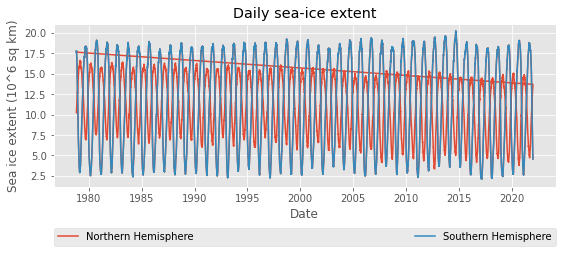

In [95]:
plt.figure(figsize=(9,3))
plt.plot(north.index,north['Extent'], label='Northern Hemisphere')
plt.plot(south.index,south['Extent'], label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent');

(1977.0, 2022.0)

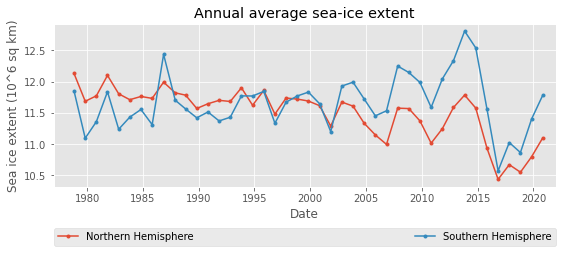

In [96]:
# resample raw data into annual averages
northyear = north.resample('12M').mean()
southyear = south.resample('12M').mean()

# remove the initial and final item as they aer averaged incorrectly (also indexes seem bad)
northyear = northyear[1:-1]
southyear = southyear[1:-1]

plt.figure(figsize=(9,3))
plt.plot(northyear.Year,northyear['Extent'], marker = '.', label='Northern Hemisphere')
plt.plot(southyear.Year,southyear['Extent'], marker = '.', label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Annual average sea-ice extent')
plt.xlim(1977, 2022)


# cheking formats of data 

In [129]:
seaice_extent_north.head()

,Year,Month,Day,Extent,Missing,Date
1978-10-26,1978,10,26,10.231,0,1978-10-26
1978-10-28,1978,10,28,10.42,0,1978-10-28
1978-10-30,1978,10,30,10.557,0,1978-10-30
1978-11-01,1978,11,1,10.67,0,1978-11-01
1978-11-03,1978,11,3,10.777,0,1978-11-03
